<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

---
# importing
---

In [1]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

In [4]:
meta_df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20reviews.csv')

---
# Dataset inspection
---

## Meta Data

In [5]:
# to get the first five rows of the data set 
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [8]:
# to get the description of the data
meta_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/3bs-buddies-b...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [9]:
#checking for duplicate entries
print('duplicates in entries = ',len(meta_df)-len(meta_df.drop_duplicates()))
print('duplicates in Restaurant Name = ',len(meta_df['Name'])-len(meta_df['Name'].drop_duplicates()))

duplicates in entries =  0
duplicates in Restaurant Name =  0


In [10]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
meta_df.Name.value_counts()

Beyond Flavours                    1
Being Hungry                       1
Shanghai Chef 2                    1
Cream Stone                        1
Dine O China                       1
                                  ..
AB's - Absolute Barbecues          1
Hunger Maggi Point                 1
Faasos                             1
Zega - Sheraton Hyderabad Hotel    1
Mustang Terrace Lounge             1
Name: Name, Length: 105, dtype: int64

In [12]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
1,000     6
400       6
1,500     5
200       5
800       5
1,300     4
350       3
900       3
550       3
1,600     3
1,100     3
750       3
1,400     2
1,700     2
1,900     2
150       2
450       2
850       1
1,750     1
300       1
2,800     1
2,500     1
1,800     1
650       1
250       1
Name: Cost, dtype: int64

In [13]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

## Reviews

In [14]:
# to get the first five rows of the data set 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [15]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [16]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [17]:
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())
# since the mean is 3.6 we will replace it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

3.601044071880333


In [18]:
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [19]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Reviews     9961 non-null   float64       
 7   Followers   8383 non-null   float64       
 8   Year        9961 non-null   float64       
 9   Month       9961 non-null   float64       
 10  Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 859.5+ KB


In [20]:
reviews_df.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [21]:
reviews_df[reviews_df['Followers'].isna()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,1.0,NaN,2019.0,5.0,15.0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,NaN,2019.0,5.0,1.0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,1.0,NaN,2019.0,5.0,15.0
14,Beyond Flavours,Kankaria.ritu,"We ordered corn cheese balls, manchow soup and...",1.0,2019-05-22 21:19:00,0.0,1.0,NaN,2019.0,5.0,21.0
24,Beyond Flavours,Amritap Datta,"Excellent experience, mouthwatering food, good...",5.0,2019-05-20 23:33:00,0.0,1.0,NaN,2019.0,5.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
9912,Chinese Pavilion,Anil Rao,The tofu with mushrooms was absolutely wonderf...,5.0,2019-04-04 02:15:00,0.0,9.0,NaN,2019.0,4.0,2.0
9918,Chinese Pavilion,Ajay Munjal,The food is delicious. Service is excellent. I...,5.0,2019-02-16 13:56:00,0.0,4.0,NaN,2019.0,2.0,13.0
9933,Chinese Pavilion,Korak Mukherjee,I was here last night with 2 of my friends. We...,1.0,2018-05-29 16:02:00,1.0,9.0,NaN,2018.0,5.0,16.0
9940,Chinese Pavilion,Anubinda Dash,The food was amazing. Do not forget to try 'Mo...,4.5,2018-03-02 19:54:00,10.0,11.0,NaN,2018.0,3.0,19.0


In [22]:
reviews_df['Followers'].fillna(0,inplace=True)

In [23]:
reviews_df[reviews_df['Reviews'].isna()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,0.0,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8778,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8779,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8780,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8781,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8782,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8783,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8784,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN
8785,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,0.0,NaN,NaN,NaN


In [24]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

---
# EDA
---

## Meta Data

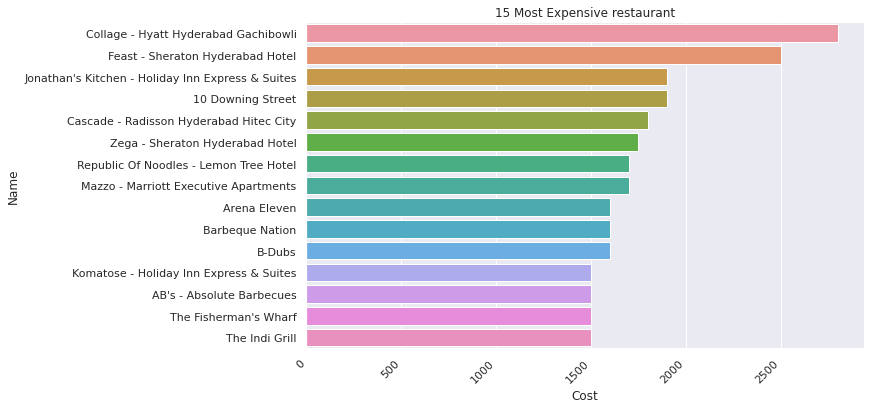

In [25]:
# checking for most expensive Restaurant
sns.barplot(y='Name',
            x="Cost", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])
plt.xticks(rotation=45,ha='right')
plt.title('15 Most Expensive restaurant')
plt.show()

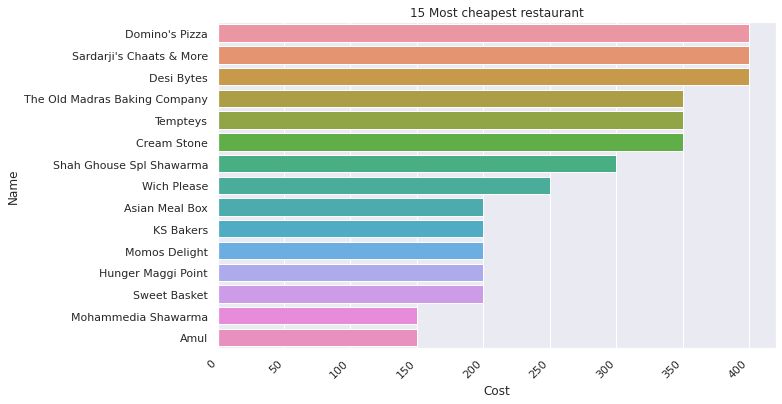

In [26]:
# checking for most expensive Restaurant
sns.barplot(y='Name',
            x="Cost", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])
plt.xticks(rotation=45,ha='right')
plt.title('15 Most cheapest restaurant')
plt.show()

In [27]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines     

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [28]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [29]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [30]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

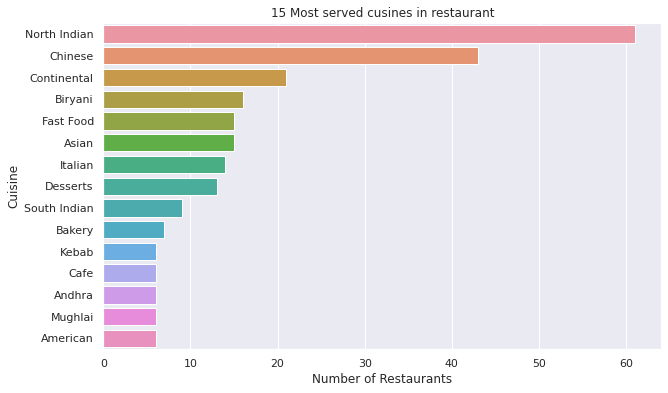

In [31]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


In [32]:
# spliting the cusines and storing in list 
Collections_list=meta_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [33]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1 

In [34]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

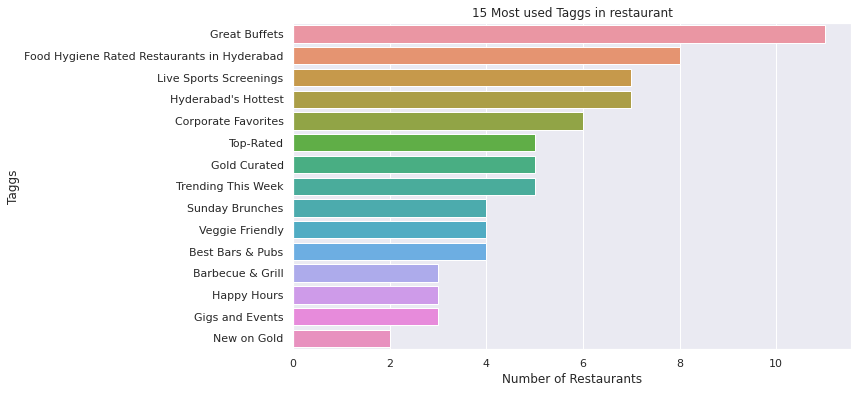

In [35]:
# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()


## Reviews

In [36]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


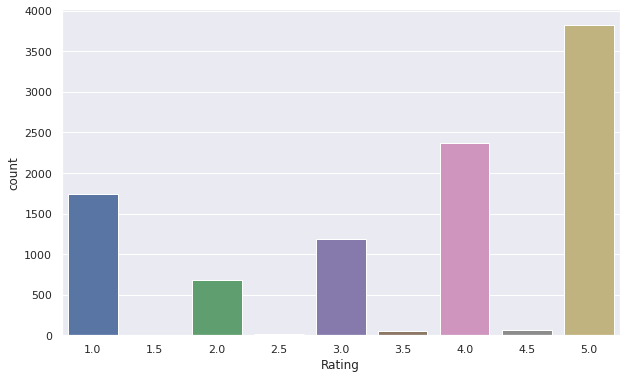

In [37]:
sns.countplot(reviews_df.Rating)

**lets find the restaurant with best reviews**

In [38]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,53.0,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,2.0,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,65.0,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,13.0,144.0,2016.0,5.0,17.0


In [39]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

,Rating,number_of_rating
count,100.000000,100.00000
mean,3.601891,99.54000
std,0.508100,2.73924
min,2.400000,77.00000
25%,3.245000,100.00000
50%,3.613081,100.00000
75%,3.846250,100.00000
max,4.880000,100.00000


* looks like we got 100 rating for all the restaurants

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

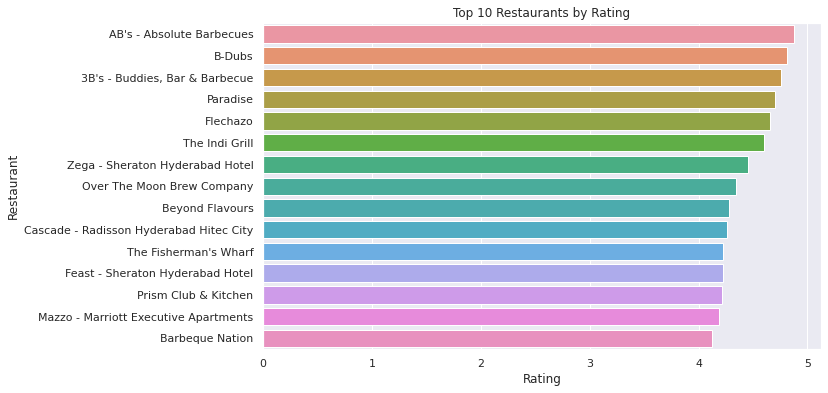

In [40]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [41]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 10000)&(df_Reviewer['Reviews']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer

,Reviewer,Reviews,Followers,Rating
56,Aanchal Khemka,945.0,11605.0,3.600000
903,Asad Rana,1086.0,12306.0,3.666667
1019,Avin Seth,1576.0,11064.0,4.500000
1285,Buddiga Sindhuri,300.0,10033.0,4.200000
1768,Food Nawabs,520.0,22129.0,4.000000
1786,Foodies Hyderabad,124.0,37976.0,4.500000
2173,Hungry Eyes,208.0,10258.0,5.000000
2816,Kunal Khanra,756.0,11440.0,4.750000
3480,Namit Agarwal,1253.0,13139.0,3.857143
4496,Rajat Goel ✳️,444.0,10149.0,4.000000


In [42]:
df_Reviewer.describe([0.90])

,Reviews,Followers,Rating
count,7442.000000,7442.000000,7442.000000
mean,32.111664,218.183284,3.578302
std,114.700948,1222.190701,1.502574
min,0.000000,0.000000,1.000000
50%,3.000000,4.000000,4.000000
90%,67.000000,266.900000,5.000000
max,3093.000000,40230.000000,5.000000


Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

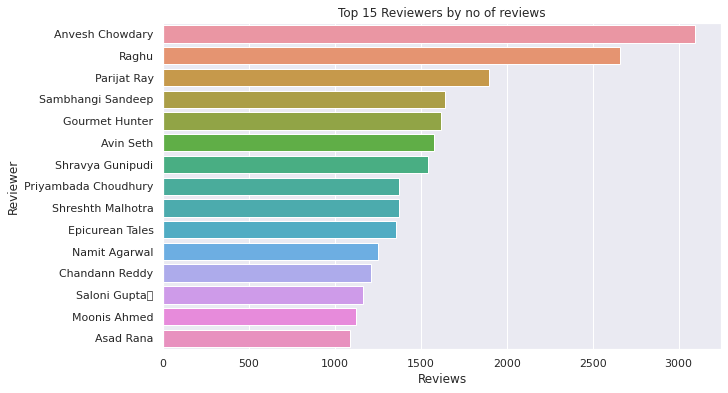

In [43]:
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

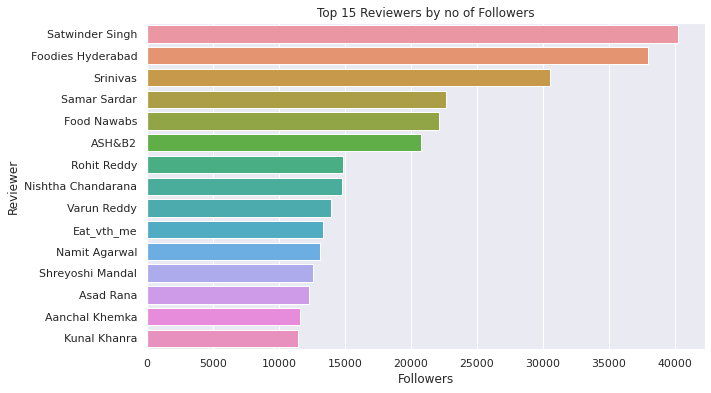

In [44]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

Text(0.5, 1.0, 'Top reviewers to focus on')

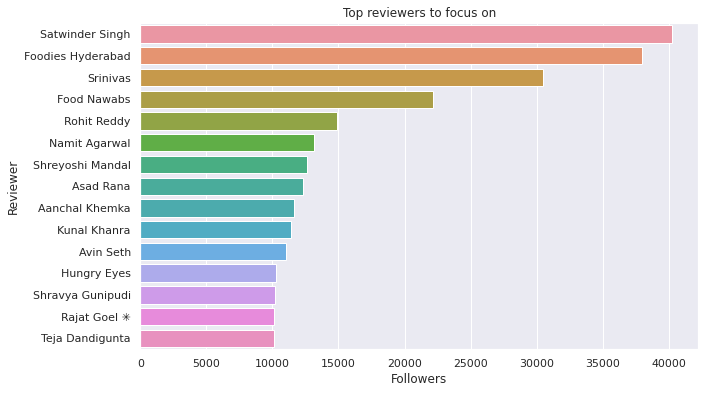

In [45]:
most_famous_reviewer
sns.barplot(data=most_famous_reviewer, x='Followers', y='Reviewer', order=most_famous_reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top reviewers to focus on')

* these are the reviewer  a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5

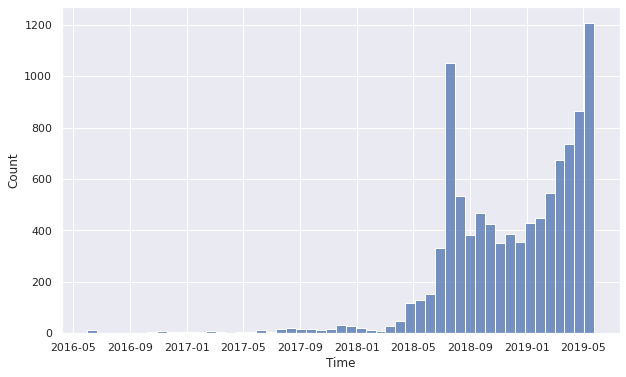

In [46]:
sns.histplot(reviews_df.Time)

* looks like most of people started reviewing restaurant after may 2018

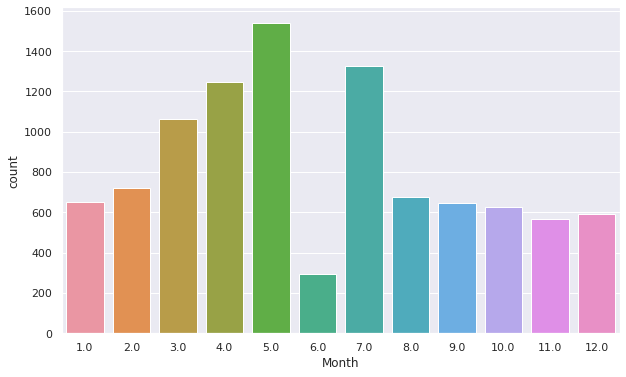

In [47]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year 

---
# Text processing 
---

In [48]:
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [49]:
!pip install contractions

In [50]:
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text


In [51]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [52]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'first', 'forty', 'well', 'everything', 'may', '‘m', 'her', 'nine', 'whereupon', 'seem', 'becoming', 'next', 'much', 'be', 'elsewhere', 'during', 'been', 'top', 'part', 'me', 'none', 'five', 'but', 'am', 'back', 'became', 'his', 'made', 'ca', 'you', 'is', 'four', 'had', 'other', 'over', 'still', 'doing', 'thereafter', 'keep', 'each', 'would', 'former', 'whereas', 'therefore', 'say', 'even', 'get', 'whole', 'hereby', 'used', 'must', 'else', 'one', 'perhaps', 'every', 'mine', 'at', 'here', 'fifteen', 'afterwards', '’ll', 'make', 'serious', 'i', 'there', 'ten', 'own', 'whatever', 'n’t', 'anything', 'did', 'fifty', 'latterly', 'as', '‘ve', 'has', 'often', 'sixty', 'if', 'done', 'these', 'hundred', 'see', 'and', 'another', 'many', 'hereupon', 'themselves', 'when', 'whom', "'d", '‘re', 'please', 'have', 'from', 'something', 'meanwhile', 'those', 'without', 'than', 'anyway', 'somehow', 'your', 'namely', 'just', 'while', 'because', 'amount', 'empty', 'whose', 'last', 'whoever', 'thru', 'name'

In [53]:
print(nlp.vocab['-PRON-'].is_stop)

False


In [54]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')
nlp.Defaults.stop_words.add('pron')

In [55]:
print(nlp.vocab['pron'].is_stop)

True


In [56]:
stop_word_list=list(nlp.Defaults.stop_words)

In [57]:
def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [58]:
#download small spacy model
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [59]:
# convert the string in lower case, remove punctuation, non leters(numbers, emoji etc),extra spaces, and non ascii characters 
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)
reviews=remove_stop_words(reviews)

In [60]:
all_words=' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience souman da kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess ur caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro

In [61]:
reviews_df['Reviews']=reviews

In [62]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0


In [63]:
#removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [64]:
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [65]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan start nice courteous server...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,place disappoint food courteous staff serene a...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,bad rating mainly chicken bone find veg food a...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,personally love prefer chinese food couple tim...,144.0,2016.0,5.0,17.0


In [66]:
!pip install pyLDAvis==2.1.2

In [67]:
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [68]:
word_data=reviews_df['Reviews'].str.split().tolist()

In [69]:
word_data

[['ambience',
  'good',
  'food',
  'good',
  'saturday',
  'lunch',
  'cost',
  'effective',
  'good',
  'place',
  'sate',
  'brunch',
  'chill',
  'friend',
  'parent',
  'waiter',
  'souman',
  'das',
  'courteous',
  'helpful'],
 ['ambience',
  'good',
  'pleasant',
  'evening',
  'service',
  'prompt',
  'food',
  'good',
  'good',
  'experience',
  'souman',
  'kudo',
  'service'],
 ['try',
  'great',
  'food',
  'great',
  'ambience',
  'thnx',
  'service',
  'pradeep',
  'subroto',
  'personal',
  'recommendation',
  'penne',
  'alfredo',
  'pasta',
  'music',
  'background',
  'amazing'],
 ['soumen',
  'das',
  'arun',
  'great',
  'guy',
  'behavior',
  'sincerety',
  'good',
  'food',
  'course',
  'like',
  'visit',
  'place'],
 ['food',
  'goodwe',
  'order',
  'kodi',
  'drumstick',
  'basket',
  'mutton',
  'biryani',
  'good',
  'thank',
  'pradeep',
  'serve',
  'enjoy',
  'ambience',
  'good'],
 ['ambiance',
  'good',
  'service',
  'good',
  'food',
  'apradeecp',
 

In [70]:
id2word=corpora.Dictionary(word_data)
corpus=[id2word.doc2bow(text) for text in word_data]

In [71]:
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2,
                                           update_every=1,
                                           passes=10,
                                           alpha="auto")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [72]:
import pyLDAvis.gensim

In [73]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds")
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.041619  0.131381       1        1  72.448907
0      0.041619 -0.131381       2        1  27.551093, topic_info=        Term         Freq        Total Category  logprob  loglift
9       good  7808.000000  7808.000000  Default  30.0000  30.0000
242      bad  1049.000000  1049.000000  Default  29.0000  29.0000
52     order  3305.000000  3305.000000  Default  28.0000  28.0000
479  chicken  3068.000000  3068.000000  Default  27.0000  27.0000
249    table   438.000000   438.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
41      like   326.370190  1687.260091   Topic2  -5.2854  -0.3537
494    money   219.760045   465.861745   Topic2  -5.6809   0.5378
44     visit   278.049463  1704.454252   Topic2  -5.4456  -0.5241
857     find   214.667047   423.226774   Topic2  -5.7043   0.6103
118     menu   223.433771   669.554261   Topic2  -5.6643   0.1916

[165 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
140       1  0.018985   accept
140       2  0.987216   accept
1998      1  0.023405    allow
1998      2  0.983013    allow
25        1  0.992415  amazing
...     ...       ...      ...
1560      2  0.996987    wrong
715       1  0.995013    yummy
715       2  0.005025    yummy
419       1  0.025819   zomato
419       2  0.974099   zomato

[250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

---
# sentiment analysis superviesd
---

---
## data Processing
---

In [74]:
def sentiment(rating):
  if rating >=3.5:
    return 0 
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [75]:
sentiment_df=reviews_df[['Reviews','Rating']]

In [76]:
sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df

,Reviews,Rating,sentiment
0,ambience good food good saturday lunch cost ef...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,try great food great ambience thnx service pra...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0
...,...,...,...
9995,madhumathi mahajan start nice courteous server...,3.0,1
9996,place disappoint food courteous staff serene a...,4.5,0
9997,bad rating mainly chicken bone find veg food a...,1.5,1
9998,personally love prefer chinese food couple tim...,4.0,0


In [83]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]


In [84]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)


In [85]:
x = sentiment_df['Reviews']
y = sentiment_df['sentiment']

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=sentiment_df['sentiment'])

In [87]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [88]:
vectorizer = TfidfVectorizer("english",min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [89]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4420
           1       0.88      0.65      0.75      2547

    accuracy                           0.84      6967
   macro avg       0.85      0.80      0.82      6967
weighted avg       0.85      0.84      0.83      6967



              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1895
           1       0.85      0.64      0.73      1092

    accuracy                           0.83      2987
   macro avg       0.84      0.79      0.80      2987
weighted avg       0.83      0.83      0.82      2987



In [90]:
train_and_score(model,X_test,X_train,y_test,y_train)

Training time: 0.0001min
				score matrix for train
********************************************************************************
	The accuracy is  0.8401033443375915
	The precision is  0.8821333333333333
	The recall is  0.6493914409108755
	The f1 is  0.7480777928539123
	the auc  is  0.7996957204554376 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4420
           1       0.88      0.65      0.75      2547

    accuracy                           0.84      6967
   macro avg       0.85      0.80      0.82      6967
weighted avg       0.85      0.84      0.83      6967



				score matrix for test
********************************************************************************
	The accuracy is  0.8279209909608303
	The precision is  0.8533007334963325
	The recall is  0.6391941391941391
	The f1 is  0.730890052356021
	the 

---
## Logestic Regrestion
---

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [93]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [94]:
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [95]:
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is d

Training time: 0.0567min
The best parameters found out to be : {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.7620771216148542 

				score matrix for train
********************************************************************************
	The accuracy is  0.8712501794172528
	The precision is  0.8406275805119736
	The recall is  0.7993718099725167
	The f1 is  0.8194807808412156
	the auc  is  0.8560207466152177 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4420
           1       0.84      0.80      0.82      2547

    accuracy                           0.87      6967
   macro avg       0.86      0.86      0.86      6967
weighted avg       0.87      0.87      0.87      6967



				score matrix for test
********************************************************************************

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

---
## Desision Tree
---

In [96]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0035min
				score matrix for train
********************************************************************************
	The accuracy is  0.8016362853451988
	The precision is  0.7276279796795623
	The recall is  0.7310561444837064
	The f1 is  0.7293380336858597
	the auc  is  0.7866819183956995 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      4420
           1       0.73      0.73      0.73      2547

    accuracy                           0.80      6967
   macro avg       0.79      0.79      0.79      6967
weighted avg       0.80      0.80      0.80      6967



				score matrix for test
********************************************************************************
	The accuracy is  0.7746903247405423
	The precision is  0.6945218198700093
	The recall is  0.684981684981685
	The f1 is  0.6897187644075611
	the 

---
## Random forest
---

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
# creating Random Forest Regressor model
rfc=RandomForestClassifier(n_jobs=-1,verbose=0)

In [99]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc,X_test, X_train, y_test, y_train,best_parameter=True)

Training time: 0.0562min
				score matrix for train
********************************************************************************
	The accuracy is  0.9823453423281183
	The precision is  0.9914841849148418
	The recall is  0.9599528857479388
	The f1 is  0.9754637941352484
	the auc  is  0.9776008772631097 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4420
           1       0.99      0.96      0.98      2547

    accuracy                           0.98      6967
   macro avg       0.98      0.98      0.98      6967
weighted avg       0.98      0.98      0.98      6967



				score matrix for test
********************************************************************************
	The accuracy is  0.8433210579176431
	The precision is  0.8505617977528089
	The recall is  0.6932234432234432
	The f1 is  0.763874873864783
	the 

In [100]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)>

### implimenting grid search random forest
---

In [101]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [102]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [103]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [104]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   21.4s finished


Training time: 0.3745min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
 
where negative mean squared error is:  0.542159943027104 

				score matrix for train
********************************************************************************
	The accuracy is  0.8794777368597255
	The precision is  0.9716494845360825
	The recall is  0.6904761904761905
	The f1 is  0.8072805139186295
	the auc  is  0.8394333458977259 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      1895
           1       0.97      0.69      0.81      1092

    accuracy                           0.88      2987
   macro avg       0.91      0.84      0.86      2987
weighted avg       0.89      0.88      0.87      2987



				score matrix for test
****************************************************************

---
## XGboost
---

In [105]:
from xgboost import XGBClassifier

In [106]:
# creating XGBRegressor model
xgbc=XGBClassifier()

In [107]:
# training and evaluating the xgb_grid
train_and_score(xgbc,X_test, X_train, y_test, y_train)

Training time: 0.0216min
				score matrix for train
********************************************************************************
	The accuracy is  0.853595521745371
	The precision is  0.8391825855175478
	The recall is  0.7416568511974873
	The f1 is  0.7874114214255941
	the auc  is  0.8298781993543997 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4420
           1       0.84      0.74      0.79      2547

    accuracy                           0.85      6967
   macro avg       0.85      0.83      0.84      6967
weighted avg       0.85      0.85      0.85      6967



				score matrix for test
********************************************************************************
	The accuracy is  0.8366253766320723
	The precision is  0.8172268907563025
	The recall is  0.7124542124542125
	The f1 is  0.7612524461839532
	the 

In [108]:
xgbc.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

### implimenting grid search xgb
---

In [109]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [110]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.3min finished


Training time: 1.3448min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 125}
 
where negative mean squared error is:  0.7526501766784452 

				score matrix for train
********************************************************************************
	The accuracy is  0.9125879144538539
	The precision is  0.8968058968058968
	The recall is  0.8598351001177856
	The f1 is  0.8779314491882142
	the auc  is  0.901410762728576 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4420
           1       0.90      0.86      0.88      2547

    accuracy                           0.91      6967
   macro avg       0.91      0.90      0.90      6967
weighted avg       0.91      0.91      0.91      6967



				score matrix for test
*****************************************************************

---
## CatBoost
---

In [111]:
!pip install catboost

In [112]:
from catboost import CatBoostClassifier

In [113]:
cb_model=CatBoostClassifier(verbose=0)

In [114]:
# training and evaluating the PolynomialFeatures
train_and_score(cb_model,X_test, X_train, y_test, y_train)

Training time: 1.1595min
 
where negative mean squared error is:  {'learn': {'Logloss': 0.24854951780981854}} 

				score matrix for train
********************************************************************************
	The accuracy is  0.9164633271135353
	The precision is  0.9119496855345912
	The recall is  0.8539458186101295
	The f1 is  0.8819951338199513
	the auc  is  0.9032172531964673 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      4420
           1       0.91      0.85      0.88      2547

    accuracy                           0.92      6967
   macro avg       0.92      0.90      0.91      6967
weighted avg       0.92      0.92      0.92      6967



				score matrix for test
********************************************************************************
	The accuracy is  0.8459993304318715
	The precision is  0.

---
## lightGBM
---

In [119]:
import lightgbm as lgb

In [120]:
lgbc=lgb.LGBMClassifier()

In [121]:
# training and evaluating the lgbr_grid
train_and_score(lgbc, X_test, X_train, y_test, y_train)

Training time: 0.045min
 
where negative mean squared error is:  defaultdict(<class 'dict'>, {}) 

				score matrix for train
********************************************************************************
	The accuracy is  0.9306731735323669
	The precision is  0.915124698310539
	The recall is  0.8932076953278367
	The f1 is  0.9040333796940194
	the auc  is  0.9227350693833752 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      4420
           1       0.92      0.89      0.90      2547

    accuracy                           0.93      6967
   macro avg       0.93      0.92      0.92      6967
weighted avg       0.93      0.93      0.93      6967



				score matrix for test
********************************************************************************
	The accuracy is  0.8543689320388349
	The precision is  0.82111436950146

In [134]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [135]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   44.8s finished


Training time: 0.7937min
The best parameters found out to be : {'max_depth': 20, 'n_estimators': 125}
 
where negative mean squared error is:  0.7711032587357676 

				score matrix for train
********************************************************************************
	The accuracy is  0.9410076072915171
	The precision is  0.9248210023866349
	The recall is  0.9128386336866903
	The f1 is  0.9187907528156491
	the auc  is  0.9350392263456075 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      4420
           1       0.92      0.91      0.92      2547

    accuracy                           0.94      6967
   macro avg       0.94      0.94      0.94      6967
weighted avg       0.94      0.94      0.94      6967



				score matrix for test
********************************************************************************
	The a

---
## score matrix for all the models 
---

In [124]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score,'train_time':model_train_time}

In [129]:
# list of all models
model_name=['Logestic Regrestion','lr','Desision Tree','Random forest','Random forest Grid','XGboost','XGboost Grid','CATBoost','lightGBM','lightGBM Grid']

In [130]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [131]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [132]:
matrix_df

,Models,accuracy,precision,recall,f1,roc_auc,train_time
0,Logestic Regrestion,0.827921,0.853301,0.639194,0.730890,0.787935,0.0001
1,lr,0.842986,0.791394,0.774725,0.782971,0.828524,0.0567
2,Desision Tree,0.774690,0.694522,0.684982,0.689719,0.755683,0.0035
3,Random forest,0.843321,0.850562,0.693223,0.763875,0.811519,0.0562
4,Random forest Grid,0.811971,0.915379,0.535139,0.675421,0.753316,0.3745
5,XGboost,0.836625,0.817227,0.712454,0.761252,0.810317,0.0216
6,XGboost Grid,0.849347,0.820359,0.752747,0.785100,0.828880,1.3448
7,CATBoost,0.845999,0.820487,0.740842,0.778633,0.823719,1.1595
8,lightGBM,0.854369,0.821114,0.769231,0.794326,0.836330,0.0450
9,lightGBM Grid,0.851356,0.816406,0.765568,0.790170,0.833180,0.5204


In [133]:
matrix_df.train_time.sum()

3.5822999999999996

## ROC curve for all the models
---

In [139]:
log_reg_best=log_reg_grid.best_estimator_
DecisionTree
rfc_best=rfc_grid.best_estimator_
xgbc_best=xgbc_grid.best_estimator_
lgbc_best=lgbc_grid.best_estimator_


In [140]:
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [141]:
from sklearn.metrics import roc_curve

In [142]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

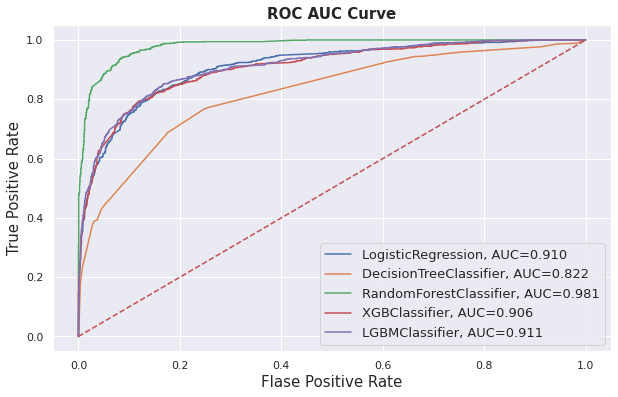

In [143]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()